# House Price Prediction Model

## Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Raw_Housing_Prices.csv file

In [2]:
data = pd.read_csv("Raw_Housing_Prices.csv")

## Checking data information

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Price'>

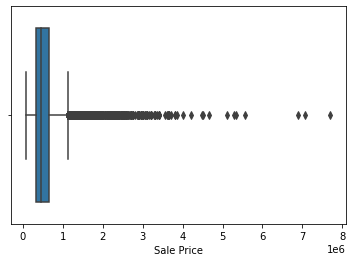

In [7]:
sns.boxplot(x=data['Sale Price'])

## Treating outliers of Sale Price

In [8]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + iqr*1.5
lower_limit = q1 - iqr*1.5

iqr, upper_limit, lower_limit

(323050.0, 1129575.0, -162625.0)

In [9]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else :
        return value
    
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

## Treating missing values for Sale Price

In [10]:
data.dropna(inplace=True, axis=0, subset=['Sale Price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

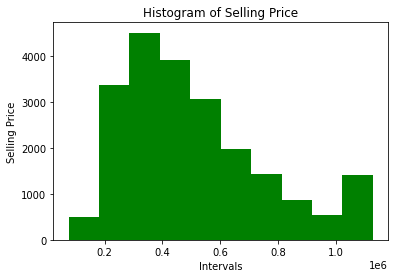

In [11]:
plt.hist(data['Sale Price'], bins=10, color='green')
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

## Treating missing values for Independent(other) variables using imputer

In [12]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [13]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude', 'Living Area after Renovation (in Sqft)']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [14]:
column = data['Zipcode'].values.reshape(-1, 1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

## Change 'Zipcode' variable type

In [15]:
data['Zipcode'] = data['Zipcode'].astype(object)
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

## Change 'Waterfront View', 'No. of Times Visited' and 'Condition of the House' variable element to numbers

In [16]:
print(data['Waterfront View'].unique())
print(data['No of Times Visited'].unique())
print(data['Condition of the House'].unique())

['No' 'Yes']
['None' 'Thrice' 'Four' 'Twice' 'Once']
['Fair' 'Excellent' 'Good' 'Bad' 'Okay']


In [17]:
def visited(value):
    if value == 'None':
        return int('0')
    elif value == 'Thrice':
        return int('3')
    elif value == 'Four':
        return int('4')
    elif value == 'Twice':
        return int('2')
    elif value == 'Once':
        return int('1')
    
data['No of Times Visited'] = data['No of Times Visited'].map(visited)

## Create new variable 'Ever Renovate' with 'No' and 'Yes' values

In [18]:
data['Ever Renovate'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


## Create one more variable 'Purchase Year' and make another variable 'Years since Renovation' using it

In [19]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Years since Renovation'] = np.where(data['Ever Renovate'] == 'Yes',abs(data['Purchase Year'] - data['Renovated Year']), 0)

## Remove unwanted variables
data.drop(columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


## Remove 'ID' column and display bar graph for 'Condition of the House', 'Waterfront View' 'Ever Renovate' 'Zipcode'

<AxesSubplot:xlabel='Condition of the House'>

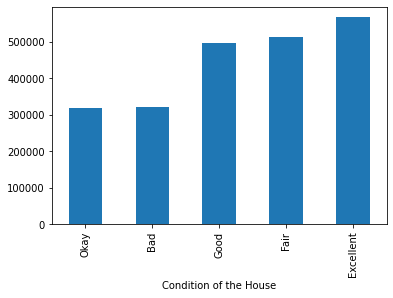

In [20]:
data.drop(columns = ['ID'], inplace = True)
data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

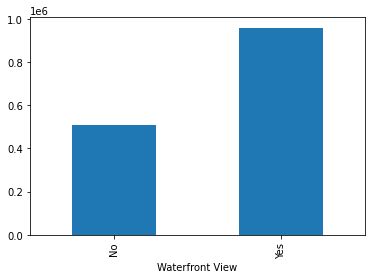

In [21]:
data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Ever Renovate'>

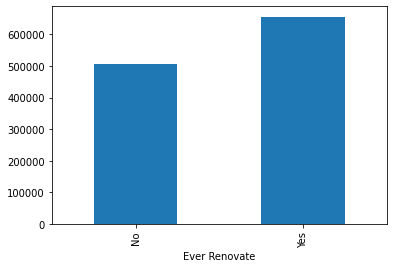

In [22]:
data.groupby('Ever Renovate',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Zipcode'>

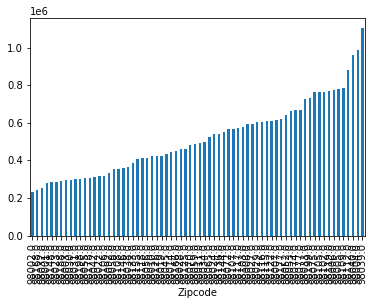

In [23]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

## Change columns name

In [24]:
data = data.rename(columns = {'Sale Price' : 'Sale_Price'})
data = data.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})
data = data.rename(columns = {'Ever Renovate' : 'Ever_Renovate'})
data = data.rename(columns = {'Waterfront View' : 'Waterfront_View'})

data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovate,Years since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


## Groupping the values of 'zipcode' column

In [25]:
# create zip_table with 'Zipcode' and 'Sale_Price' columns
Zip_table = data.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price', ascending = True)
Zip_table.head()

# create another column 'Zipcode_Group' by binning the 'Sale_Price' column
Zip_table['Zipcode_Group'] = pd.cut(Zip_table['Sale_Price'], bins = 10,
                                   labels = ['Zipcode_Group_0',
                                            'Zipcode_Group_1',
                                            'Zipcode_Group_2',
                                            'Zipcode_Group_3',
                                            'Zipcode_Group_4',
                                            'Zipcode_Group_5',
                                            'Zipcode_Group_6',
                                            'Zipcode_Group_7',
                                            'Zipcode_Group_8',
                                            'Zipcode_Group_9'],
                                   include_lowest = True)

# Drop the 'Sale_Price' column from zip_table table
Zip_table = Zip_table.drop(columns = 'Sale_Price')


# Merge the information of data and zip_table table using left join
data = pd.merge(data, Zip_table, left_on = 'Zipcode', how = 'left', right_index = True)
# And finally drop 'Zipcode' column
data = data.drop(columns = 'Zipcode')

data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovate,Years since Renovation,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,No,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,Yes,26,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,47.7379,-122.233,2720.0,8062,No,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,No,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,No,0,Zipcode_Group_4


## Create dummy variables of 'Condition_of_the_House', 'Waterfront_View', 'Ever_Renovate' and 'Zipcode_Group' columns

In [26]:
data = pd.get_dummies(data, columns = ['Condition_of_the_House', 'Waterfront_View', 'Ever_Renovate', 'Zipcode_Group'], drop_first = True)
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovate_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## Drop some columns for fast performance

In [27]:
data.drop(columns = ['Area of the House from Basement (in Sqft)','Condition_of_the_House_Okay','No of Floors','Lot Area after Renovation (in Sqft)','No of Bedrooms'], inplace = True)

## Train/Test set

In [28]:
## Extract Dependent = y and Independent = x. And scaling the data of x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = data['Sale_Price']
x = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
x = pd.DataFrame(data = x, columns = data.drop(columns = ['Sale_Price']).columns)
x.head()

,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),...,Ever_Renovate_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-1.447526,-0.979905,-0.228291,-0.30579,-0.563993,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,0.175684,0.533718,-0.189858,-0.30579,-0.563993,0.245134,0.680915,1.161645,-0.746479,-0.432664,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.447526,-1.426369,-0.123276,-0.30579,-1.468566,-0.658697,1.293731,1.283619,-0.135806,1.070082,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,1.149611,-0.130534,-0.243983,-0.30579,-0.563993,1.397518,0.204281,-0.283288,-1.271941,-0.914127,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.148958,-0.435436,-0.169628,-0.30579,0.340581,-0.658697,-0.544715,0.409587,1.199152,-0.272177,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [29]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 25), (6483, 25), (15126,), (6483,))

## Gradient Boosting Regressor

In [30]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=4, min_samples_split=2, learning_rate=0.1, loss='ls')

gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)

0.9392671242888718

In [31]:
gbr.score(x_test, y_test)

0.9063113417776419

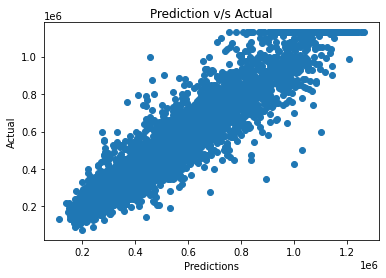

In [32]:
predictions = gbr.predict(x_test)

plt.scatter(predictions, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Prediction v/s Actual')
plt.show()

In [33]:
actual_predict_price = pd.DataFrame({'actual_price' : y_test,
                              'predicted_price' : predictions})
actual_predict_price = actual_predict_price.sort_values(by = 'actual_price')

In [34]:
actual_predict_price.head()

,actual_price,predicted_price
1149,75000.0,198266.457432
5866,89000.0,170453.434893
12551,90000.0,241530.291961
5639,100000.0,180576.089156
10424,109000.0,190598.750138


## Residual

In [35]:
residuals = predictions - y_test

residual_tabel = pd.DataFrame({'residuals' : residuals,
                              'predictions' : predictions})
residual_tabel = residual_tabel.sort_values(by = 'predictions')

In [36]:
z = [i for i in range(int(residual_tabel['predictions'].max()))]
k = [0 for i in range(int(residual_tabel['predictions'].max()))]

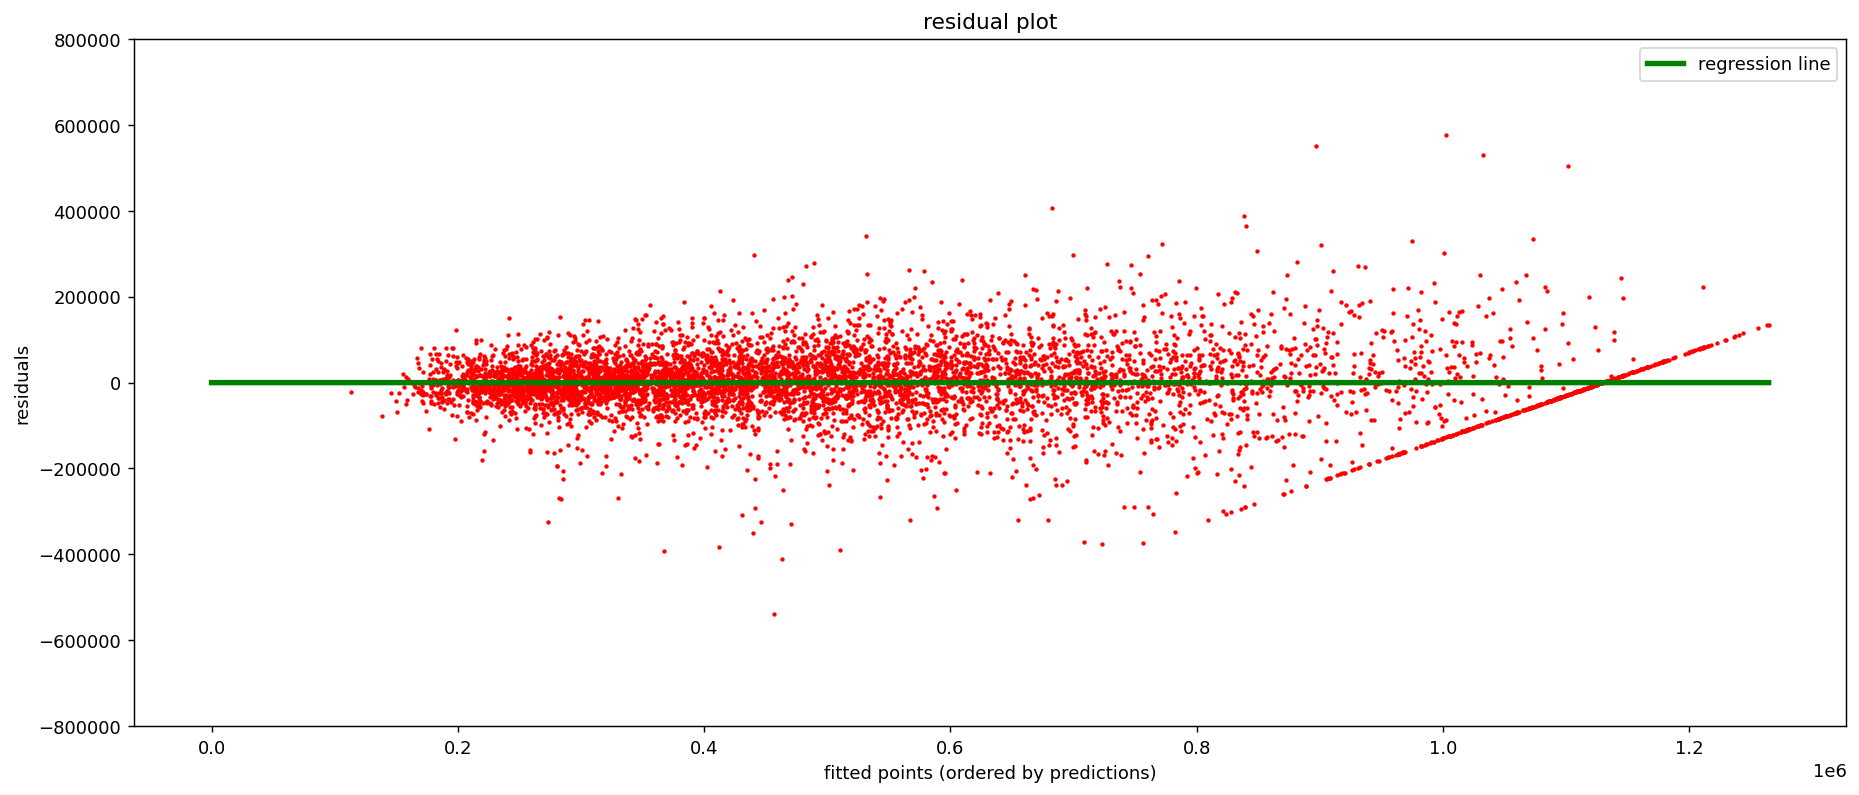

In [37]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter(residual_tabel['predictions'], residual_tabel['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## Distribution of errors

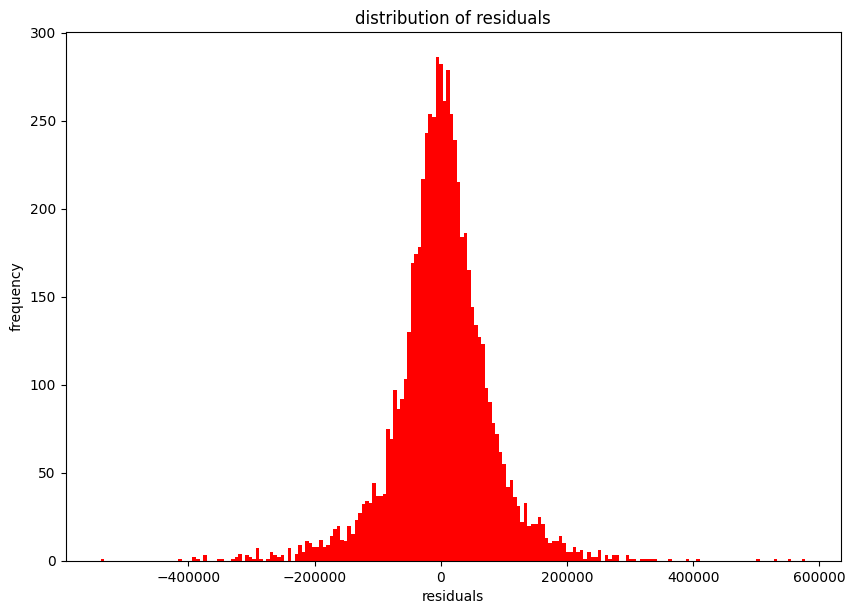

In [38]:
plt.figure(dpi = 100, figsize = (10, 7))
plt.hist(residual_tabel['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [39]:
print(x_train.columns)

Index(['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Times Visited', 'Overall Grade', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)', 'Years since Renovation',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Waterfront_View_Yes',
       'Ever_Renovate_Yes', 'Zipcode_Group_Zipcode_Group_1',
       'Zipcode_Group_Zipcode_Group_2', 'Zipcode_Group_Zipcode_Group_3',
       'Zipcode_Group_Zipcode_Group_4', 'Zipcode_Group_Zipcode_Group_5',
       'Zipcode_Group_Zipcode_Group_6', 'Zipcode_Group_Zipcode_Group_7',
       'Zipcode_Group_Zipcode_Group_8', 'Zipcode_Group_Zipcode_Group_9'],
      dtype='object')


In [40]:
for i in data.head():
    print(i)

Sale_Price
No of Bathrooms
Flat Area (in Sqft)
Lot Area (in Sqft)
No of Times Visited
Overall Grade
Basement Area (in Sqft)
Age of House (in Years)
Latitude
Longitude
Living Area after Renovation (in Sqft)
Years since Renovation
Condition_of_the_House_Excellent
Condition_of_the_House_Fair
Condition_of_the_House_Good
Waterfront_View_Yes
Ever_Renovate_Yes
Zipcode_Group_Zipcode_Group_1
Zipcode_Group_Zipcode_Group_2
Zipcode_Group_Zipcode_Group_3
Zipcode_Group_Zipcode_Group_4
Zipcode_Group_Zipcode_Group_5
Zipcode_Group_Zipcode_Group_6
Zipcode_Group_Zipcode_Group_7
Zipcode_Group_Zipcode_Group_8
Zipcode_Group_Zipcode_Group_9


## Saving the model

In [41]:
from joblib import dump, load
dump(gbr, 'Parvej Ali House Pricing.joblib')

['Parvej Ali House Pricing.joblib']

In [42]:
x_test.values

array([[ 0.50032645,  0.57727552, -0.23041563, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-0.14895766,  0.7841736 , -0.15852245, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [ 0.50032645,  0.51193929, -0.25291544, ..., -0.11227393,
        -0.16884974, -0.04815825],
       ...,
       [ 2.44817879,  1.62265527, -0.16552347, ..., -0.11227393,
         5.92242562, -0.04815825],
       [ 1.79889468,  2.47202632, -0.21457885, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [ 1.47425262,  2.73337126, -0.05584895, ..., -0.11227393,
        -0.16884974, -0.04815825]])

In [43]:
y_test

19829     610360.0
12530     740000.0
1613      537500.0
8688      520000.0
18206    1129575.0
           ...    
10799     411000.0
13199     835000.0
1763      597326.0
5751     1129575.0
11620    1129575.0
Name: Sale_Price, Length: 6483, dtype: float64

In [44]:
for i in range(5):
    print(predictions[i])

599177.6073746055
623495.4389990793
607901.2427418183
586731.168175157
1065037.4260123216


In [45]:
data.to_csv('Raw_Housing_Prices_5.csv', index = False)